In [66]:
#libraries 

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV    
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#data fetch and visualize 

x , y = make_moons(n_samples=10000 , noise=0.4 , random_state=42)

In [68]:
#data visualize 

x.shape , y.shape

((10000, 2), (10000,))

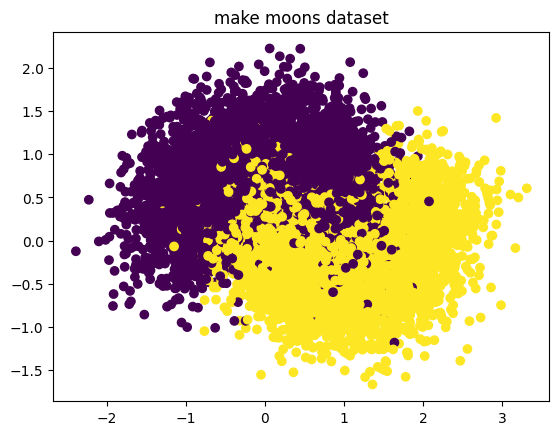

In [69]:
plt.scatter(x[: , 0] , x[: , 1] , c=y)
plt.title("make moons dataset" , fontsize=12)
plt.show()

In [70]:
#splitting dataset into train and test

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [71]:
#implementing the tree pipeline 

tree_clf = Pipeline([
    ("tree clf" , DecisionTreeClassifier())
])

tree_clf.fit(x_train , y_train)

,steps,"[('tree clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None


In [72]:
#hyperparameter tuning

parameters = {
    'max_leaf_nodes' : list(range(2,100)),
    'min_samples_split': [2, 3, 4]
}


grid_search = GridSearchCV(
    estimator=tree_clf[0],
    param_grid=parameters,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(x_train , y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_leaf_nodes': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [73]:
print("best parameters according to the grid search cv is " , grid_search.best_params_)

best parameters according to the grid search cv is  {'max_leaf_nodes': 23, 'min_samples_split': 2}


In [74]:
best_tree_clf = grid_search.best_estimator_

In [75]:
#cross val test

scoring = ['accuracy' , 'f1' , 'precision' , 'recall']

for methods in scoring:
    score_array = cross_val_score(best_tree_clf , x_train , y_train , cv=3 , scoring=methods)
    print(score_array) 

[0.84514436 0.85864267 0.85858965]
[0.84109273 0.85778951 0.86031864]
[0.8667724  0.86595583 0.85242291]
[0.81689088 0.84977578 0.868362  ]


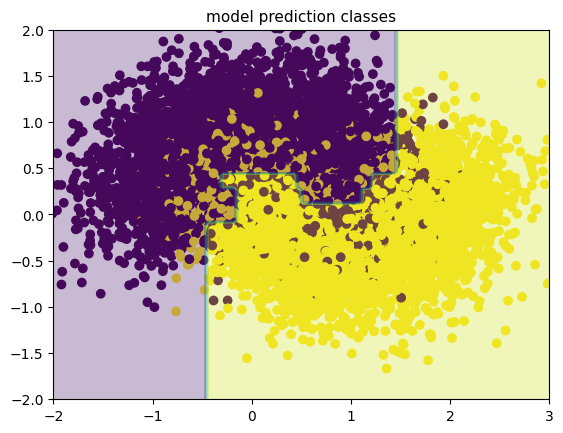

In [76]:
def plot_stuff(x , y , model , axes):
    x1 = np.linspace(axes[0] , axes[1] , 100)
    x2 = np.linspace(axes[2] , axes[3] , 100)
    
    x1_grid , x2_grid = np.meshgrid(x1 , x2)
    x_new = np.c_[x1_grid.ravel() , x2_grid.ravel()]
    y_pred = model.predict(x_new).reshape(x1_grid.shape)
    plt.scatter(x[: , 0] , x[: , 1] , c=y)
    plt.contourf(x1_grid , x2_grid , y_pred , alpha=0.3)
    plt.axis(axes)
    plt.title('model prediction classes' , fontsize=11)
    plt.show()
    
plot_stuff(x_train , y_train , best_tree_clf , [-2 , 3 , -2 , 2])

In [77]:
#final_test_on_test_dataset

y_test_set_predict = best_tree_clf.predict(x_test)
accuracy = accuracy_score(y_test , y_test_set_predict)
f1 = f1_score(y_test , y_test_set_predict)

print(f"The accuracy final is {accuracy:.4f} and f1 score is {f1:.4f}")



The accuracy final is 0.8735 and f1 score is 0.8733


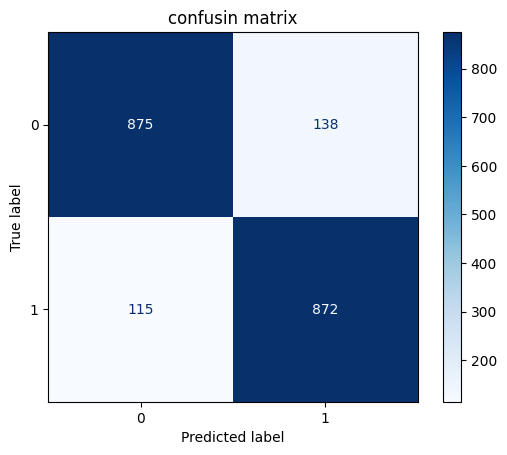

In [78]:

cm = confusion_matrix(y_test , y_test_set_predict)
disp  = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues )
plt.title("confusin matrix")
plt.show()

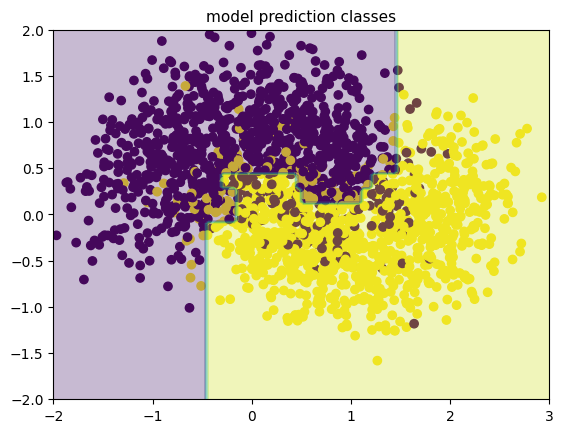

In [79]:
#plot 

plot_stuff(x_test , y_test , best_tree_clf , [-2 , 3 , -2 , 2])